In [1]:
! chmod +x run.sh

In [2]:
! ./run.sh

mkdir: cannot create directory ‘build’: File exists
-- Configuring done
-- Generating done
-- Build files have been written to: /content/build
Consolidate compiler generated dependencies of target Filter
[ 20%] Linking CXX executable Filter
[100%] Built target Filter


In [4]:
import cv2
import os
import numpy as np
import subprocess
import matplotlib.pyplot as plt

def median_filter(input_image, output_image, R, method):
  input = cv2.imread(input_image)
  cp = subprocess.run(['./Filter', input_image, output_image, str(R), method], capture_output=True)
  time = int(cp.stdout.decode().rstrip())
  filtered_image = cv2.imread(output_image)
  return input, filtered_image, time

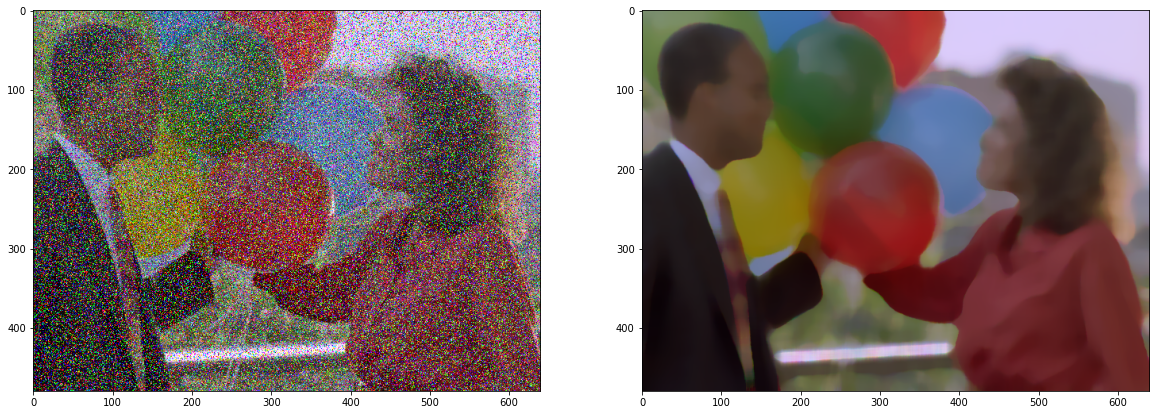

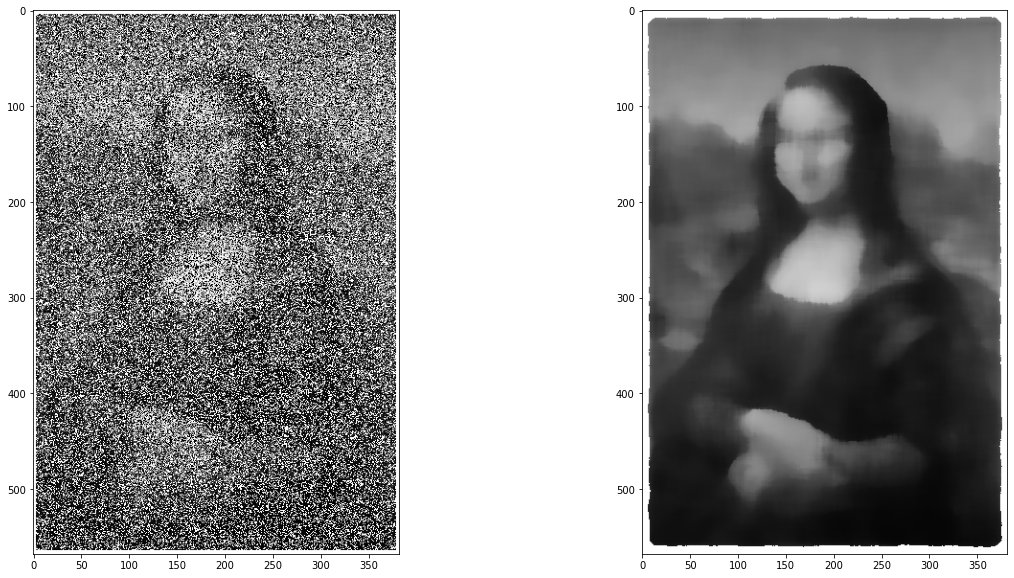

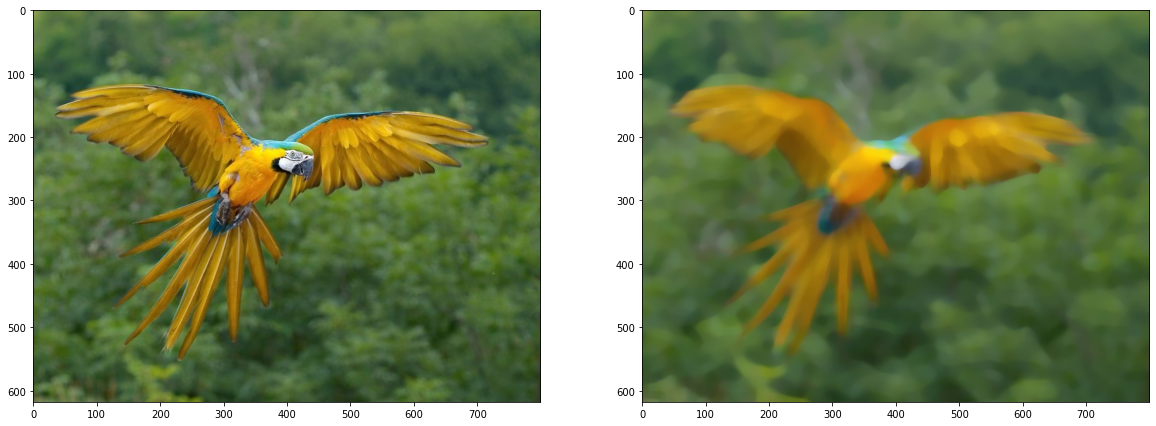

In [9]:
input_image_dir = './input_images'
output_image_dir = './output_image'
for filename in os.listdir(input_image_dir):
    input_image = os.path.join(input_image_dir, filename)
    output_image = os.path.join(output_image_dir, filename)
    input, filtered, time = median_filter(input_image, output_image, 10, 'huang')
    plt.figure(figsize=(16, 10))
    plt.subplot(1, 2, 1)
    input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)
    plt.imshow(input)
    plt.subplot(1, 2, 2)
    filtered = cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)
    plt.imshow(filtered)

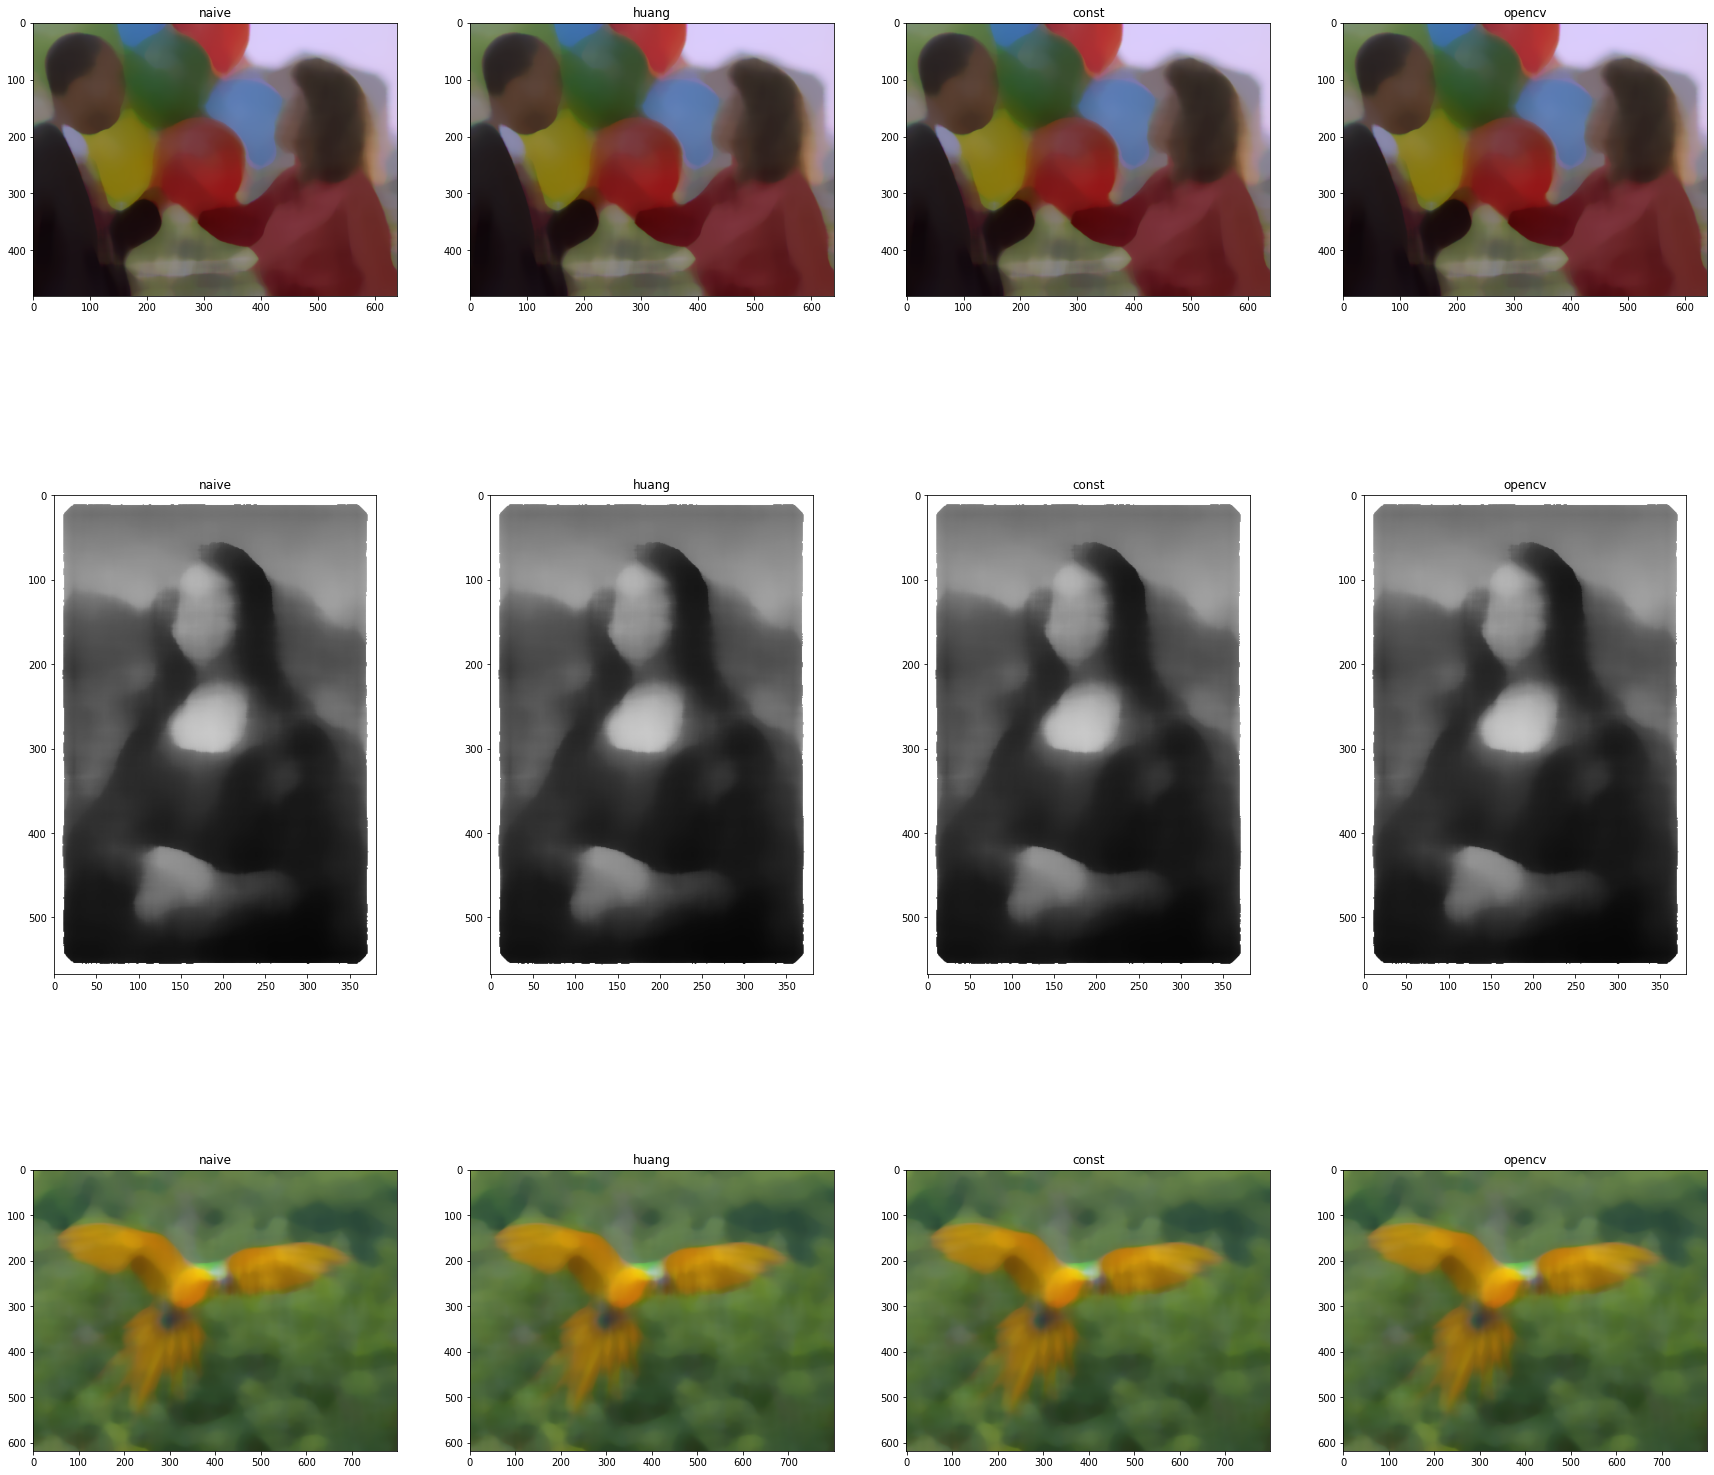

In [25]:
input_image_dir = './input_images'
output_image_dir = './output_image'
fig = plt.figure(figsize=(30, 30))
row = 3
column = 4
for i, filename in enumerate(os.listdir(input_image_dir)):
    input_image = os.path.join(input_image_dir, filename)
    output_image = os.path.join(output_image_dir, filename)
    for j, method in enumerate(['naive', 'huang', 'const', 'opencv'], 1):
      input, filtered, time = median_filter(input_image, output_image, 20, method)
      filtered = cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)
      ax = fig.add_subplot(row, column, i*column+j)
      ax.title.set_text(method)
      plt.imshow(filtered)
plt.show()

In [27]:
from PIL import Image

plt.figure(figsize=(20, 10))

input_image = os.path.join(input_image_dir, filename)
output_image = os.path.join(output_image_dir, filename)

image = np.array(Image.open(input_image))
pix_time = image.shape[1] * image.shape[0] / (10 ** 6)

naive_time = np.array([median_filter(input_image,  output_image, R, 'naive')[2] for R in range(1, 13)]) / pix_time
huang_time = np.array([median_filter(input_image,  output_image, R, 'huang')[2] for R in range(1, 120)]) / pix_time
const_time = np.array([median_filter(input_image,  output_image, R, 'const')[2] for R in range(1, 120)]) / pix_time
opencv_time = np.array([median_filter(input_image, output_image, R, 'opencv')[2] for R in range(1, 120)]) / pix_time

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Dependence of the operating time on the radius')

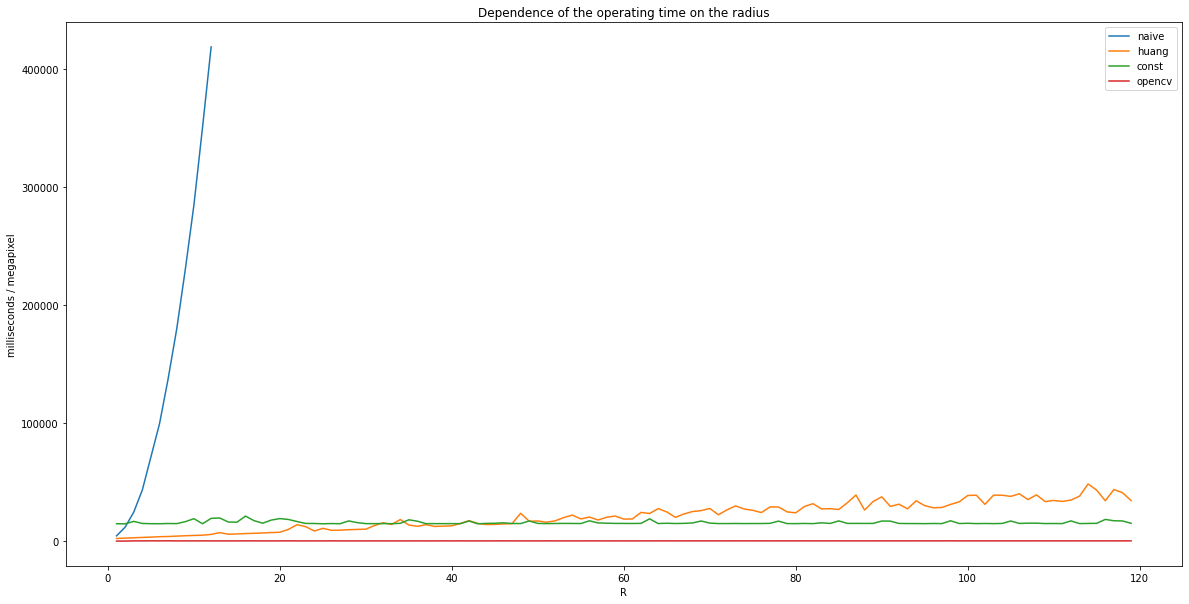

In [28]:
plt.figure(figsize=(20, 10))

plt.plot(np.arange(1, 13), naive_time, label='naive')
plt.plot(np.arange(1, 120), huang_time, label='huang')
plt.plot(np.arange(1, 120), const_time, label='const')
plt.plot(np.arange(1, 120), opencv_time, label='opencv')

plt.ylabel('milliseconds / megapixel')
plt.xlabel('R')
plt.legend()
plt.title('Dependence of the operating time on the radius')

# Построим тоже самое, только без Naive метода

Text(0.5, 1.0, 'Dependence of the operating time on the radius without Naive')

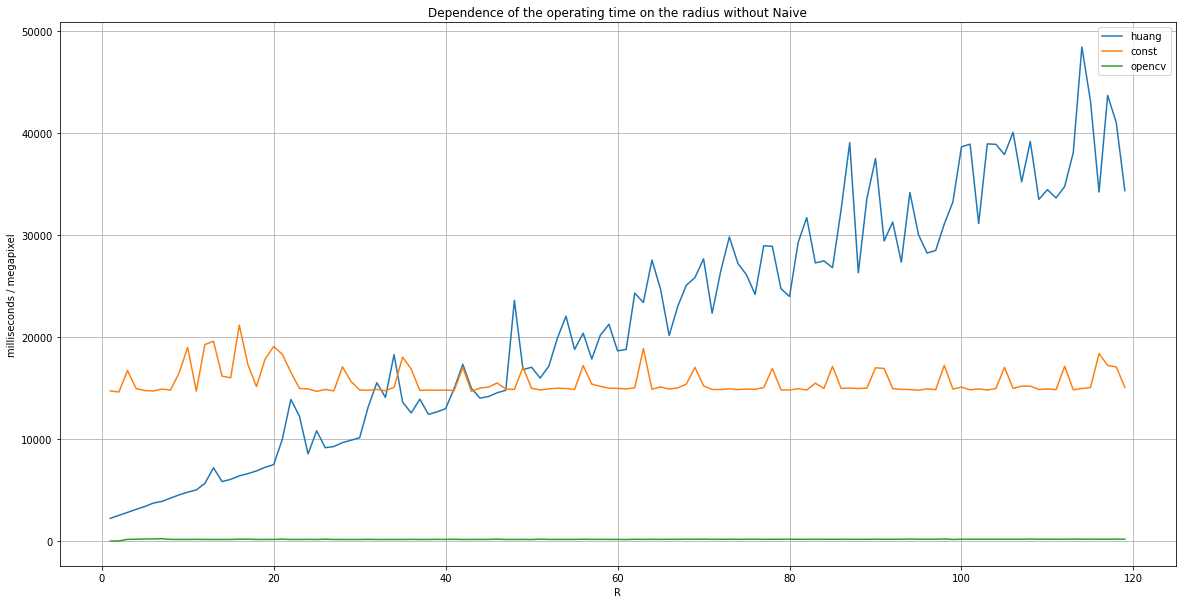

In [30]:
plt.figure(figsize=(20, 10))

plt.plot(np.arange(1, 120), huang_time, label='huang')
plt.plot(np.arange(1, 120), const_time, label='const')
plt.plot(np.arange(1, 120), opencv_time, label='opencv')

plt.ylabel('milliseconds / megapixel')
plt.xlabel('R')
plt.grid(":")
plt.legend()
plt.title('Dependence of the operating time on the radius without Naive')

### можно из граффика заметить, что до примерно R < 34, лучше подходит huange, потом там есть oчень маленький участок, можно примерно до R<35 const, потом R < 47 huang, a после этого можно просто const   

(но вообще, opencv спрявлается этой задачей, лучше всех)
- R < 34 => huang
- 34 <= R < 35 -> const
- 35 <= R < 47 -> huang
- 47 <= R -> const 

### Фактическая асимптотика
- naive работает O(R^2*logR) -> из графика можно понять
- huang работает за O(R)
- const работает за O(1)

и понятно что при изображении размерами `H * W`
- O(H * W * R^2*logR)
- huang работает за O(H * W * R)
- const работает за O(H * W)

### Потребляемая память

- naive для каждой итерации, создает массив R^2 => O(R^2)
- huang для гистограммы тратит О(N)
- const, так же как huang.
- и понятно, что для каждого нового изображения возьмем память О(H * W)